In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 머신러닝
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# 교자검증
from sklearn.model_selection import cross_val_score
# 분리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("./data/train.csv", index_col='no')
train
test = pd.read_csv("./data/test.csv", index_col='no')
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States
48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States


In [3]:
train.info()
# test.info()

#모든 열의 빈 데이터 개수 확인
# test.isna().sum()
#결측값 정보 출력
# train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [4]:
# int
train['age'].unique()
train['fnlwgt'].unique()
train['education-num'].unique()
train['capital-gain'].unique()
train['capital-loss'].unique()
train['hours-per-week'].unique()

# Object
train['education'].unique()
train['marital-status'].unique()
train['relationship'].unique()
train['race'].unique()
train['sex'].unique()


# '?' 있는 컬럼
train['workclass'].unique()
train['occupation'].unique()
train['native-country'].unique()


array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', ' ?', ' Germany', ' Peru', ' Ecuador', ' Iran',
       ' Thailand', ' Dominican-Republic', ' Poland', ' Scotland',
       ' Italy', ' Jamaica', ' China', ' Portugal', ' Columbia',
       ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

In [5]:
# int
test['age'].unique()
test['fnlwgt'].unique()
test['education-num'].unique()
test['capital-gain'].unique()
test['capital-loss'].unique()
test['hours-per-week'].unique()

# object
test['education'].unique()
test['marital-status'].unique()
test['relationship'].unique()
test['race'].unique()
test['sex'].unique()


# '?' 있는 컬럼
test['workclass'].unique()
test['occupation'].unique()
test['native-country'].unique()

array([' United-States', ' Puerto-Rico', ' Portugal', ' ?',
       ' El-Salvador', ' Iran', ' India', ' Philippines', ' Vietnam',
       ' Cuba', ' Italy', ' Hungary', ' Jamaica', ' Germany', ' Mexico',
       ' England', ' Columbia', ' China', ' Nicaragua', ' Taiwan',
       ' Scotland', ' Ireland', ' Poland', ' South', ' France',
       ' Guatemala', ' Japan', ' Canada', ' Ecuador',
       ' Dominican-Republic', ' Yugoslavia', ' Haiti', ' Greece',
       ' Outlying-US(Guam-USVI-etc)', ' Laos', ' Trinadad&Tobago',
       ' Thailand', ' Peru', ' Honduras', ' Hong', ' Cambodia'],
      dtype=object)

In [6]:
# 문자열 데이터 앞 공백 제거
df = train[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
df = df.apply(lambda x: x.str.strip(), axis=1)
train[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']] = df

df = test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
df = df.apply(lambda x: x.str.strip(), axis=1)
test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']] = df

In [7]:
# train['native-country'] 레이블 인코딩
train['native-country'].value_counts()

# train['income'][train['native-country']=='United-States'].value_counts()\
pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['native-country'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1
df = {'India':42, 'Hungary':41, 'Japan':40, 'England':39, 'Canada':38, 'Iran':37, 'Italy':36,
       'Greece':35, 'Ireland':34, 'Germany':33, 'Cambodia':32, 'Taiwan':31, 'Yugoslavia':30,
       'France':29, 'Philippines':28, 'China':27, 'United-States':26, '?':25, 'Cuba':24, 'Hong':23,
       'Ecuador':22, 'South':21, 'Portugal':20, 'Poland':19, 'Thailand':18, 'Jamaica':17, 'Peru':16,
       'Scotland':15, 'Puerto-Rico':14, 'Honduras':13, 'Haiti':12, 'Laos':11,
       'Outlying-US(Guam-USVI-etc)':10, 'Mexico':9, 'El-Salvador':8,
       'Dominican-Republic':7, 'Guatemala':6, 'Columbia':5, 'Nicaragua':4, 'Vietnam':3,
       'Trinadad&Tobago':2, 'Holand-Netherlands':1 }


label_train = train['native-country']
label_train.unique()

pt1 = label_train.map(df)
pt1
train['native-country'] = pt1
# train

# test['native-country'] 레이블 인코딩
df = {'India':42, 'Hungary':41, 'Japan':40, 'England':39, 'Canada':38, 'Iran':37, 'Italy':36,
       'Greece':35, 'Ireland':34, 'Germany':33, 'Cambodia':32, 'Taiwan':31, 'Yugoslavia':30,
       'France':29, 'Philippines':28, 'China':27, 'United-States':26, '?':25, 'Cuba':24, 'Hong':23,
       'Ecuador':22, 'South':21, 'Portugal':20, 'Poland':19, 'Thailand':18, 'Jamaica':17, 'Peru':16,
       'Scotland':15, 'Puerto-Rico':14, 'Honduras':13, 'Haiti':12, 'Laos':11,
       'Outlying-US(Guam-USVI-etc)':10, 'Mexico':9, 'El-Salvador':8,
       'Dominican-Republic':7, 'Guatemala':6, 'Columbia':5, 'Nicaragua':4, 'Vietnam':3,
       'Trinadad&Tobago':2, 'Holand-Netherlands':1 }


label_test = test['native-country']
label_test.unique()

pt1 = label_test.map(df)
pt1
test['native-country'] = pt1
# test

In [8]:
train['workclass'].unique()

pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['workclass'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1

,income
workclass,
Self-emp-inc,0.554205
Federal-gov,0.382904
Local-gov,0.299251
Self-emp-not-inc,0.278959
State-gov,0.262281
Private,0.219402
?,0.105232
Without-pay,0.083333
Never-worked,0.000000


In [9]:
train['workclass']

no
1                 Private
2                 Private
3                 Private
4                 Private
5                 Private
               ...       
29301             Private
29302             Private
29303    Self-emp-not-inc
29304             Private
29305                   ?
Name: workclass, Length: 29305, dtype: object

In [10]:
# train['workclass'].unique()

# df = {'Private':2, 'Self-emp-not-inc':2, 'Local-gov':2, '?':1, 'State-gov':2,
#        'Self-emp-inc':4, 'Federal-gov':3, 'Without-pay':1, 'Never-worked':1}

# label_train = train['workclass']
# label_train.unique()

# pt1 = label_train.map(df)
# pt1
# train['workclass'] = pt1
# # train

# df = {'Private':2, 'Self-emp-not-inc':2, 'Local-gov':2, '?':1, 'State-gov':2,
#        'Self-emp-inc':4, 'Federal-gov':3, 'Without-pay':1, 'Never-worked':1}

# label_test = test['workclass']
# label_test.unique()

# pt1 = label_test.map(df)
# pt1
# test['workclass'] = pt1
# # train

<AxesSubplot:xlabel='native-country', ylabel='count'>

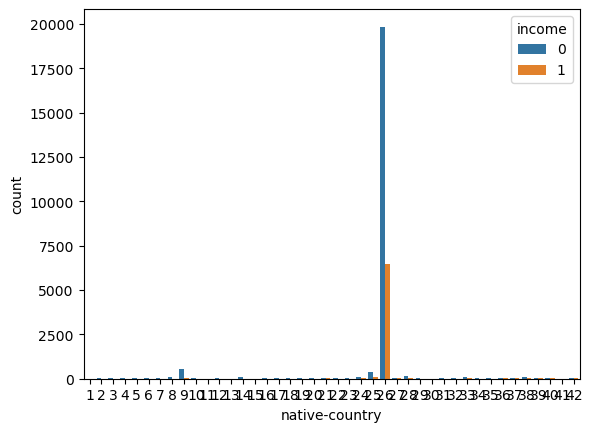

In [11]:
# plt.ylim(0,1000)
plt.xlabel
sns.countplot(data=train,x='native-country',hue='income')

In [12]:
# print(set(test['native-country'].unique()) - set(train['native-country'].unique()))
# # test train 컬럼 동일

# # train['native-country'] 레이블 인코딩
# train['native-country'].value_counts()

# # train['income'][train['native-country']=='United-States'].value_counts()\
# pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
#                 index=['native-country'], # 데이터 요약시 확인하고 싶은 컬럼
#                 aggfunc='mean' ) 
# pt1 = pt1.sort_values(by='income', ascending=False)
# pt1
# df = {'India':42, 'Hungary':41, 'Japan':40, 'England':39, 'Canada':38, 'Iran':37, 'Italy':36,
#        'Greece':35, 'Ireland':34, 'Germany':33, 'Cambodia':32, 'Taiwan':31, 'Yugoslavia':30,
#        'France':29, 'Philippines':28, 'China':27, 'United-States':26, '?':25, 'Cuba':24, 'Hong':23,
#        'Ecuador':22, 'South':21, 'Portugal':20, 'Poland':19, 'Thailand':18, 'Jamaica':17, 'Peru':16,
#        'Scotland':15, 'Puerto-Rico':14, 'Honduras':13, 'Haiti':12, 'Laos':11,
#        'Outlying-US(Guam-USVI-etc)':10, 'Mexico':9, 'El-Salvador':8,
#        'Dominican-Republic':7, 'Guatemala':6, 'Columbia':5, 'Nicaragua':4, 'Vietnam':3,
#        'Trinadad&Tobago':2, 'Holand-Netherlands':1 }


# label_train = train['native-country']
# label_train.unique()

# pt1 = label_train.map(df)
# pt1
# train['native-country'] = pt1
# # train

In [13]:
# # test['native-country'] 레이블 인코딩
# df = {'India':42, 'Hungary':41, 'Japan':40, 'England':39, 'Canada':38, 'Iran':37, 'Italy':36,
#        'Greece':35, 'Ireland':34, 'Germany':33, 'Cambodia':32, 'Taiwan':31, 'Yugoslavia':30,
#        'France':29, 'Philippines':28, 'China':27, 'United-States':26, '?':25, 'Cuba':24, 'Hong':23,
#        'Ecuador':22, 'South':21, 'Portugal':20, 'Poland':19, 'Thailand':18, 'Jamaica':17, 'Peru':16,
#        'Scotland':15, 'Puerto-Rico':14, 'Honduras':13, 'Haiti':12, 'Laos':11,
#        'Outlying-US(Guam-USVI-etc)':10, 'Mexico':9, 'El-Salvador':8,
#        'Dominican-Republic':7, 'Guatemala':6, 'Columbia':5, 'Nicaragua':4, 'Vietnam':3,
#        'Trinadad&Tobago':2, 'Holand-Netherlands':1 }


# label_test = test['native-country']
# label_test.unique()

# pt1 = label_test.map(df)
# pt1
# test['native-country'] = pt1
# # test

In [14]:
print(set(test['race'].unique()) - set(train['race'].unique()))

train['race'].value_counts()

# train['income'][train['native-country']=='United-States'].value_counts()\
pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['race'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1

set()


,income
race,
White,0.255851
Asian-Pac-Islander,0.255713
Amer-Indian-Eskimo,0.124138
Black,0.118516
Other,0.117155


In [15]:
train['race'].unique()
df = {'White':2, 'Asian-Pac-Islander':2, 'Black':1, 'Amer-Indian-Eskimo':1,
       'Other':1}

label_train = train['race']
label_train.unique()

pt1 = label_train.map(df)
pt1
train['race'] = pt1

# ================= test

test['race'].unique()
df = {'White':2, 'Asian-Pac-Islander':2, 'Black':1, 'Amer-Indian-Eskimo':1,
       'Other':1}

label_test = test['race']
label_test
pt1 = label_test.map(df)
pt1
test['race'] = pt1


In [16]:
pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['relationship'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1
# train['relationship'].unique()

#['Not-in-family':2, 'Husband':3, 'Unmarried':1, 'Other-relative':1, 'Own-child':1, 'Wife':3]

,income
relationship,
Wife,0.466423
Husband,0.452035
Not-in-family,0.105146
Unmarried,0.060567
Other-relative,0.035398
Own-child,0.014273


In [17]:
df = {'Not-in-family':2, 'Husband':3, 'Unmarried':1, 'Other-relative':1, 'Own-child':1, 'Wife':3}

label_train = train['relationship']
label_train.unique()

pt1 = label_train.map(df)
pt1
train['relationship'] = pt1

# =============== test

df = {'Not-in-family':2, 'Husband':3, 'Unmarried':1, 'Other-relative':1, 'Own-child':1, 'Wife':3}

label_test = test['relationship']
label_test.unique()

pt1 = label_test.map(df)
pt1
test['relationship'] = pt1


<AxesSubplot:xlabel='education-num', ylabel='count'>

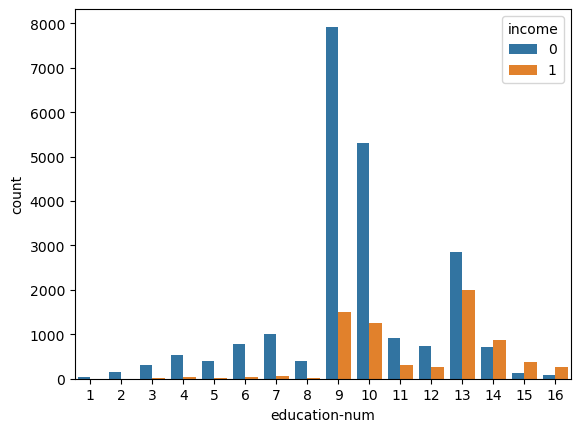

In [18]:
sns.countplot(data=train,x='education-num',hue='income')

In [19]:
train['sex'].value_counts()

# train['income'][train['native-country']=='United-States'].value_counts()\
pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['sex'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1

,income
sex,
Male,0.305132
Female,0.109252


In [20]:
train['sex'].unique()

df = {"Male":2, "Female":1}

label_train = train['sex']
label_train.unique()

pt1 = label_train.map(df)
pt1
train['sex'] = pt1

# =================== test

test['sex'].unique()

df = {"Male":2, "Female":1}

label_test = test['sex']
label_test.unique()

pt1 = label_test.map(df)
pt1
test['sex'] = pt1

In [21]:
pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['hours-per-week'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1

# train['hours-per-week'].unique()

,income
hours-per-week,
61,1.000000
73,1.000000
69,1.000000
89,0.666667
74,0.666667
...,...
94,0.000000
96,0.000000
97,0.000000


In [22]:
# plt.figure(figsize=(18,5))
# sns.countplot(data=train,x='hours-per-week',hue='income')
# sns.countplot(data=train,x='age',hue='income')


# 0 ~  29 : 1
# 30 ~ 36 : 2
# 37 ~ 51 : 3
# 52 ~ 61 : 2
# 62 ~ 99 : 1

In [23]:
# train['age'].unique()

# # df = { 17:1, 18:1, 19:1, 20:1, 21:1, 22:1, 23:1, 24:1, 25:1, 26:1, 27:1, 28:1, 29:1,  62:1, 63:1, 64:1, 65:1, 66:1, 67:1, 68:1, 69:1, 70:1, 71:1, 72:1, 73:1, 74:1, 75:1, 76:1, 77:1, 78:1, 79:1, 80:1, 81:1, 82:1, 83:1, 84:1, 85:1, 86:1, 87:1, 88:1, 89:1, 90:1, 30:2, 31:2, 32:2, 33:2, 34:2, 35:2, 36:2,52:2, 53:2, 54:2, 55:2, 56:2, 57:2, 58:2, 59:2, 60:2, 61:2, 37:3, 38:3, 39:3, 40:3, 41:3,42:3,43:3,44:3, 45:3, 46:3, 47:3, 48:3, 49:3, 50:3, 51:3}
# df = {17:3, 18:3, 19:3, 20:3, 21:3, 22:3, 23:3, 24:3, 25:3, 26:3, 27:3, 28:3, 29:3, 30:3, 31:3, 32:3, 33:3, 34:3, 35:2, 
#     36:2, 37:2, 38:2, 39:2, 40:2, 41:2, 42:2, 43:2, 44:2, 45:2, 46:2, 47:2, 48:2, 49:2, 50:2, 51:2, 52:2, 53:1, 54:1, 55:1, 
#     56:1, 57:1, 58:1, 59:1, 60:1, 61:1, 62:1, 63:1, 64:1, 65:1, 66:1, 67:1, 68:1, 69:1, 70:1, 71:1, 72:1, 73:1, 74:1, 75:1,
#     76:1, 77:1, 78:1, 79:1, 80:1, 81:1, 82:1, 83:1, 84:1, 85:1, 86:1, 87:1, 88:1, 89:1, 90:1}
# t_age = train['age']
# t_age

# pt1 = t_age.map(df)
# pt1
# train['age'] = pt1

# train['age'].unique()

In [24]:
# # df = { 17:1, 18:1, 19:1, 20:1, 21:1, 22:1, 23:1, 24:1, 25:1, 26:1, 27:1, 28:1, 29:1,  62:1, 63:1, 64:1, 65:1, 66:1, 67:1, 68:1, 69:1, 70:1, 71:1, 72:1, 73:1, 74:1, 75:1, 76:1, 77:1, 78:1, 79:1, 80:1, 81:1, 82:1, 83:1, 84:1, 85:1, 86:1, 87:1, 88:1, 89:1, 90:1, 30:2, 31:2, 32:2, 33:2, 34:2, 35:2, 36:2,52:2, 53:2, 54:2, 55:2, 56:2, 57:2, 58:2, 59:2, 60:2, 61:2, 37:3, 38:3, 39:3, 40:3, 41:3,42:3,43:3,44:3, 45:3, 46:3, 47:3, 48:3, 49:3, 50:3, 51:3}
# df = {17:3, 18:3, 19:3, 20:3, 21:3, 22:3, 23:3, 24:3, 25:3, 26:3, 27:3, 28:3, 29:3, 30:3, 31:3, 32:3, 33:3, 34:3, 35:2, 
#     36:2, 37:2, 38:2, 39:2, 40:2, 41:2, 42:2, 43:2, 44:2, 45:2, 46:2, 47:2, 48:2, 49:2, 50:2, 51:2, 52:2, 53:1, 54:1, 55:1, 
#     56:1, 57:1, 58:1, 59:1, 60:1, 61:1, 62:1, 63:1, 64:1, 65:1, 66:1, 67:1, 68:1, 69:1, 70:1, 71:1, 72:1, 73:1, 74:1, 75:1,
#     76:1, 77:1, 78:1, 79:1, 80:1, 81:1, 82:1, 83:1, 84:1, 85:1, 86:1, 87:1, 88:1, 89:1, 90:1}
# t_age = test['age']
# t_age

# pt1 = t_age.map(df)
# pt1
# test['age'] = pt1

# test['age'].unique()

In [25]:
# # train['education-num'] 레이블 인코딩  => 별로
# # 15, 16 / 14, 13 / 12, 11, 10, 9 / 4,8,7,5,6,3,2,1

# pt1 = train.pivot_table(values='income',
#                 index=['education-num'],
#                 aggfunc='mean' ) 
# pt1 = pt1.sort_values(by='income', ascending=False)
# pt1

# # train['education-num'].unique()

# df = {15:6, 16:6, 14:5, 13:4 , 12:3, 11:3, 10:2, 9:2 , 4:1,8:1,7:1,5:1,6:1,3:1,2:1,1:1}

# label_train = train['education-num']
# label_train.unique()

# pt1 = label_train.map(df)
# pt1
# train['education-num'] = pt1
# train

In [26]:
# df = {15:6, 16:6, 14:5, 13:4 , 12:3, 11:3, 10:2, 9:2 , 4:1,8:1,7:1,5:1,6:1,3:1,2:1,1:1}

# label_test = test['education-num']
# label_test.unique()

# pt1 = label_test.map(df)
# pt1
# test['education-num'] = pt1
# test

In [27]:
# ++
train.corr()

,age,fnlwgt,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,-0.075753,0.035084,0.373611,0.030907,0.083999,0.078498,0.054413,0.073100,0.054281,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.027067,-0.095051,0.029929,-0.005051,-0.001513,-0.010154,-0.105003,-0.002994
education-num,0.035084,-0.030600,1.000000,0.135641,0.089585,0.017029,0.127651,0.083925,0.147569,0.231152,0.331798
relationship,0.373611,-0.027067,0.135641,1.000000,0.145463,0.424649,0.087416,0.081293,0.257628,0.045653,0.431472
race,0.030907,-0.095051,0.089585,0.145463,1.000000,0.112341,0.021266,0.021693,0.046601,0.052061,0.101364
sex,0.083999,0.029929,0.017029,0.424649,0.112341,1.000000,0.050664,0.042925,0.231437,0.002420,0.215613
capital-gain,0.078498,-0.005051,0.127651,0.087416,0.021266,0.050664,1.000000,-0.031401,0.088609,0.027155,0.221387
capital-loss,0.054413,-0.001513,0.083925,0.081293,0.021693,0.042925,-0.031401,1.000000,0.055271,0.017238,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.257628,0.046601,0.231437,0.088609,0.055271,1.000000,0.018042,0.231045
native-country,0.054281,-0.105003,0.231152,0.045653,0.052061,0.002420,0.027155,0.017238,0.018042,1.000000,0.100510


In [28]:
train['education-num'].unique()
train.columns
train[['age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,
1,25,Private,11th,7,Divorced,Machine-op-inspct,2,2,2,0,0,40,26
2,39,Private,Some-college,10,Divorced,Other-service,2,2,1,0,1721,55,26
3,35,Private,Bachelors,13,Never-married,Handlers-cleaners,2,2,1,0,0,50,12
4,64,Private,Assoc-voc,11,Divorced,Tech-support,2,2,1,0,0,40,26
5,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,3,2,2,0,0,70,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,HS-grad,9,Never-married,Sales,1,1,2,0,0,40,14
29302,21,Private,HS-grad,9,Never-married,Sales,1,1,2,0,0,40,26
29303,18,Self-emp-not-inc,10th,6,Never-married,Farming-fishing,1,2,2,0,0,40,26


In [29]:
X_train = train.loc[:,:'native-country']
# X_train = train[['age', 'workclass', 'education', 'education-num',
#        'marital-status', 'occupation', 'relationship', 'race', 'sex',
       # 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y_train = train['income']
X_test = test
# X_test = test[['age', 'workclass', 'education', 'education-num',
#        'marital-status', 'occupation', 'relationship', 'race', 'sex',
#        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

In [30]:
X_train = pd.get_dummies(X_train)
X_train
X_test = pd.get_dummies(X_test)
X_test

,age,fnlwgt,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
no,,,,,,,,,,,,,,,,,,,,,
29306,18,245274,10,1,2,2,0,0,16,26,...,0,0,0,0,0,0,0,0,0,0
29307,29,83003,9,3,2,1,0,0,40,26,...,0,0,0,1,0,0,0,0,0,0
29308,45,35136,13,3,1,2,0,0,40,26,...,0,0,0,0,0,0,0,0,1,0
29309,42,64631,13,3,2,2,0,0,40,26,...,0,0,0,0,0,0,0,0,0,0
29310,41,195821,16,3,2,1,0,1902,40,26,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,116789,9,3,2,2,0,0,60,26,...,0,0,0,0,0,0,0,0,0,0
48839,48,185079,9,2,2,1,0,0,50,26,...,0,0,0,0,0,0,0,0,0,0
48840,63,117473,10,3,2,2,4386,0,40,26,...,0,0,0,0,0,1,0,0,0,0


In [31]:
print("훈련용 문제 :",X_train.shape)
print("훈련용 문제 :",y_train.shape)
print("데스트용 문제 :",X_test.shape)

훈련용 문제 : (29305, 57)
훈련용 문제 : (29305,)
데스트용 문제 : (19537, 57)


In [32]:
tree_model1 = DecisionTreeClassifier(max_depth=11)
res = cross_val_score(tree_model1,X_train,y_train,cv=5)
res
res.mean()
# 0.8527213786043337

0.8521071489506911

In [33]:
tree_model1.fit(X_train,y_train)

pre1 = tree_model1.predict(X_test)
pre1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
model=KNeighborsClassifier(n_neighbors=13)

res = cross_val_score(model,X_train,y_train,cv=5)
res
res.mean()

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.7932434738099301

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [36]:
gb = GradientBoostingClassifier(random_state=7)
gb.fit(X_train, y_train)

res = cross_val_score(gb,X_train,y_train,cv=8)
res
res.mean()

# ========== 이전 =========
# 7, 23 : 0.8660296877665926
# 0 : 0.8660638116362396

# =========== 추가처리 edu-num
# 0 : 0.8652448387647158
# 23 : 0.8652789626343627

# =========== 추가처리 age만
# 23 : 0.8651424671557754

# =========== 추가처리 edu-num, age
# 0 : 0.8644941136324858

# =========== 추가처리 sex, relationship(1,2,3), age
# 0 : 0.8650058727842571  rs=7,cv=8


# =========== 추가처리 sex
# 0 : 0.8657566968094181  rs=7,cv=5
# 0 : 0.8662684617924793  rs=7,cv=8

# =========== 추가처리 sex, relationship(1,2,3), education-num
# 0 : 0.8662343274447533  rs=7,cv=8
# 0 : 0.8662343274447533  rs=0,cv=8


# =========== 추가처리 sex, relationship(1,2,3)  ===>  04
# 0 : 0.8662685549284894  rs=7,cv=8

0.8662685549284894

In [135]:
pred = gb.predict(X_test)
result = pd.read_csv("./data/sample_submission.csv")
result
result['income'] = pred
# result.to_csv('./data/phy04.csv', index=False)

# 0.87253

In [1]:
# !pip install xgboost

     --------------------------------------- 70.9/70.9 MB 22.6 MB/s eta 0:00:00


In [37]:
from xgboost import XGBClassifier

In [38]:
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=4)
xgb_model.fit(X_train, y_train)
res = cross_val_score(xgb_model,X_train,y_train,cv=8)
res.mean()

0.8729569312265819

In [110]:
res.mean()

0.8704999101423774

In [39]:
# 0.8693055991432084

pred = xgb_model.predict(X_test)
result = pd.read_csv("./data/sample_submission.csv")
result
result['income'] = pred
# result.to_csv('./data/phy05.csv', index=False)
# result.to_csv('./data/phy07.csv', index=False)


In [392]:
# random forest 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

In [393]:
forest_model = RandomForestClassifier(n_estimators=100,random_state=10)

In [394]:
res = cross_val_score(forest_model,X_train,y_train,cv=9)
res.mean()

0.8550077382208179